# Getting the IRIS dataset

In [11]:
#import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score, davies_bouldin_score
from sklearn.metrics import v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, calinski_harabasz_score
from sklearn.cluster import MiniBatchKMeans

from scipy import linalg
import itertools
import pylab as pl
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
plt.style.use('seaborn')

In [12]:
#load iris dataset
iris = load_iris()
##iris.keys()

#convert it to dataframe
df= pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                 columns= iris['feature_names'] + ['target'])

df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
print(df.shape)
df

(150, 6)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,virginica
146,6.3,2.5,5.0,1.9,2.0,virginica
147,6.5,3.0,5.2,2.0,2.0,virginica
148,6.2,3.4,5.4,2.3,2.0,virginica


This IRIS dataset consists of 150 datas with 6 columns.

# Understanding the dataset

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   target             150 non-null    float64 
 5   species            150 non-null    category
dtypes: category(1), float64(5)
memory usage: 6.3 KB


In [14]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [15]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64

In [16]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [17]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

We can now know the respective data types of each columns and also, we know that it consists of 50 samples from each of the 3 species: setosa, virginica, and versicolor.

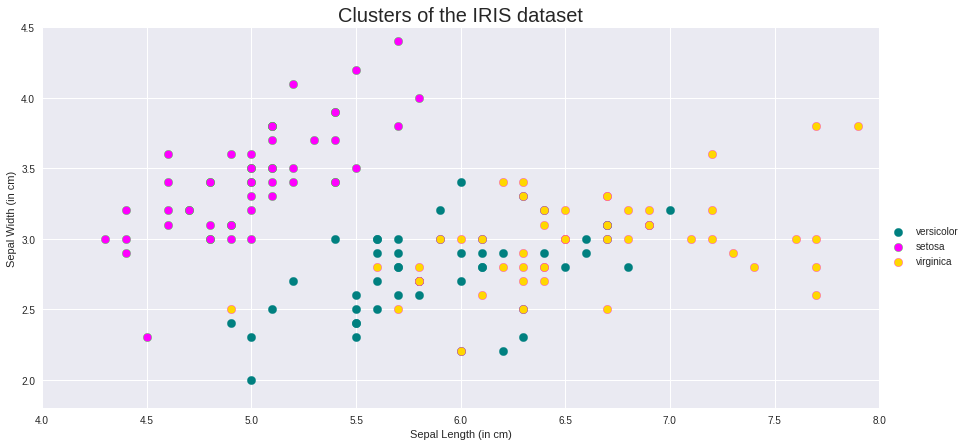

In [18]:
fig, ax = plt.subplots(figsize=(15,7)) 
plt.scatter(x=df[df['species'] == 'versicolor']['sepal length (cm)'],
            y=df[df['species'] == 'versicolor']['sepal width (cm)'],
            s=70,edgecolor='teal', linewidth=0.3, c='teal', label='versicolor')


plt.scatter(x=df[df['species'] == 'setosa']['sepal length (cm)'],
            y=df[df['species'] == 'setosa']['sepal width (cm)'],
            s=70,edgecolor='lime', linewidth=0.3, c='magenta', label='setosa')


plt.scatter(x=df[df['species'] == 'virginica']['sepal length (cm)'],
            y=df[df['species'] == 'virginica']['sepal width (cm)'],
            s=70,edgecolor='magenta', linewidth=0.3, c='gold', label='virginica')


plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))
plt.xlim(4,8)
plt.ylim(1.8,4.5)
ax.set_ylabel('Sepal Width (in cm)')
ax.set_xlabel('Sepal Length (in cm)')
plt.title('Clusters of the IRIS dataset', fontsize = 20)
plt.show()

# Cleaning and visualising the clustering data

In [19]:
#dropping the species column as it is in the category form
clustering_data = df.iloc[:,[0,1,2,3]]
clustering_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


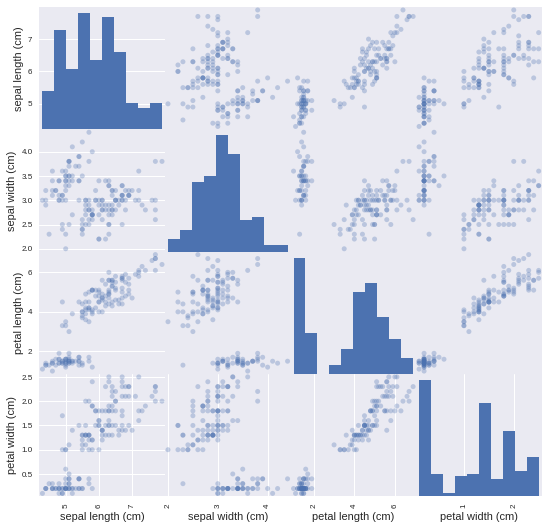

In [20]:
axes = pd.plotting.scatter_matrix(clustering_data, figsize=(9, 9), s=100, alpha=0.3)
plt.show()

Above is the scatter plot matrix to see how the datas are spread, in other words, used to explore the relationships between the combinations of variables.

# Performing KMeans

In [21]:
#store the respective wcss for the certain no of clusters
wcss=[]

#for each number of clusters, compute the wcss using KMeans and append the inertia into the array
for i in range(1,15):
    kmeans = KMeans(i)
    kmeans.fit(clustering_data)
    wcss.append(kmeans.inertia_)
np.array(wcss)

array([681.3706    , 152.34795176,  78.85144143,  57.22847321,
        46.44618205,  39.03998725,  34.29971212,  29.99042641,
        28.05051617,  26.20049465,  24.57151854,  22.6846604 ,
        21.33475308,  20.20507581])

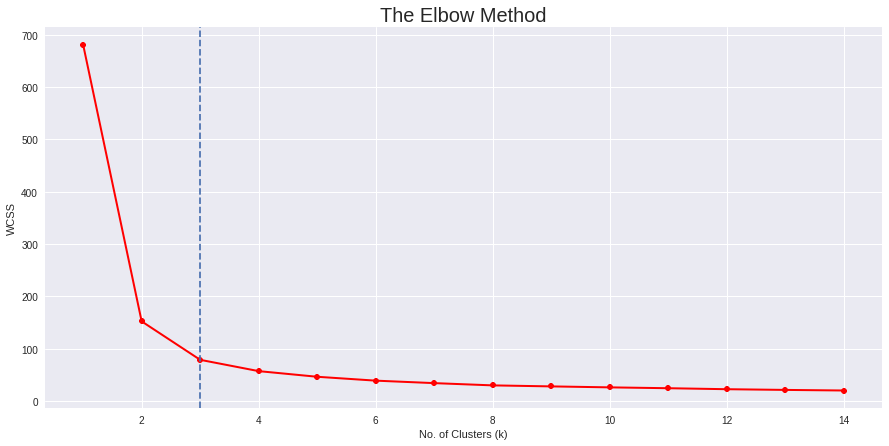

In [22]:
fig, ax = plt.subplots(figsize=(15,7))
ax = plt.plot(range(1,15),wcss, linewidth=2, color="red", marker ="8")
plt.axvline(x=3, ls='--')
plt.ylabel('WCSS')
plt.xlabel('No. of Clusters (k)')
plt.title('The Elbow Method', fontsize = 20)
plt.show()

In [23]:
#predict the clustering data which type it falls under
km = KMeans(n_clusters=3, init='k-means++', max_iter = 300, n_init = 10, random_state = 0)
km.fit(clustering_data)
clustering_prediction = clustering_data.copy()
clustering_prediction['target_prediction'] = km.fit_predict(clustering_data)
clustering_prediction

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_prediction
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [24]:
km.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [25]:
KM_clustered = clustering_prediction.copy()

frames = [df['species'], KM_clustered['target_prediction']]
result = pd.concat(frames, axis = 1)
print(result.shape)
result.sample(10)

(150, 2)


,species,target_prediction
60,versicolor,0
139,virginica,2
132,virginica,2
54,versicolor,0
149,virginica,0
80,versicolor,0
72,versicolor,0
50,versicolor,0
10,setosa,1
96,versicolor,0


In [26]:
for category_no in range(3):

    #group by species and count the size of target_prediction by the category no
    clusters = pd.DataFrame(result[result['target_prediction'] == category_no].groupby('species').size())
    clusters.columns=['Size']
    #print(clusters)
    
    new_index = clusters.index[clusters['Size'] == clusters['Size'].max()].tolist()
    #print(new_index)
    new_index[0]

    rowIndex = result.index[result['target_prediction'] == category_no]
    result.loc[rowIndex, 'TransLabel'] = new_index[0]
    
    print(category_no, new_index[0])

0 versicolor
1 setosa
2 virginica


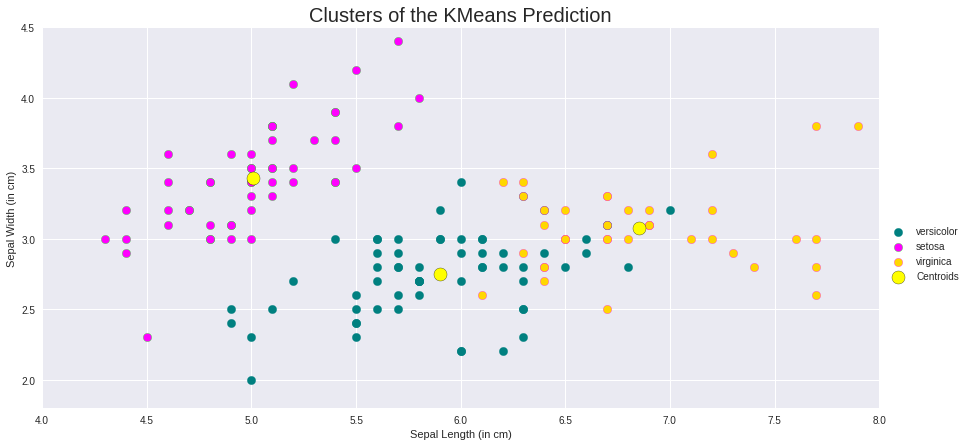

In [27]:
fig, ax = plt.subplots(figsize=(15,7)) 
plt.scatter(x=clustering_prediction[clustering_prediction['target_prediction'] == 0]['sepal length (cm)'],
            y=clustering_prediction[clustering_prediction['target_prediction'] == 0]['sepal width (cm)'],
            s=70,edgecolor='teal', linewidth=0.3, c='teal', label='versicolor')


plt.scatter(x=clustering_prediction[clustering_prediction['target_prediction'] == 1]['sepal length (cm)'],
            y=clustering_prediction[clustering_prediction['target_prediction'] == 1]['sepal width (cm)'],
            s=70,edgecolor='lime', linewidth=0.3, c='magenta', label='setosa')


plt.scatter(x=clustering_prediction[clustering_prediction['target_prediction'] == 2]['sepal length (cm)'],
            y=clustering_prediction[clustering_prediction['target_prediction'] == 2]['sepal width (cm)'],
            s=70,edgecolor='magenta', linewidth=0.3, c='gold', label='virginica')

plt.scatter(x=km.cluster_centers_[:, 0], y=km.cluster_centers_[:, 1], s = 170, c = 'yellow', label = 'Centroids',edgecolor='black', linewidth=0.3)
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))
plt.xlim(4,8)
plt.ylim(1.8,4.5)
ax.set_ylabel('Sepal Width (in cm)')
ax.set_xlabel('Sepal Length (in cm)')
plt.title('Clusters of the KMeans Prediction', fontsize = 20)
plt.show()

In [28]:
# print(result)
print("Performance for K-Means\n")

#calculate the number of correct species identified
correct_species = (df['species'] == result['TransLabel']).sum()
#over the total no of data
accuracy_score = correct_species/df.shape[0]
print('Accuracy score: ', accuracy_score)

#calculate the Silhouette Score
silhouette_score_km = silhouette_score(clustering_data, result['TransLabel'],metric='sqeuclidean')
print('Silhouette Score: ', silhouette_score_km)

#calculate Homogeneity Score
print('Homogeneity Score: ', homogeneity_score(df['species'], result['TransLabel']))

#calculate Completeness Score
print('Completeness Score: ', completeness_score(df['species'], result['TransLabel']))

#V Measure Score
print('V Measure Score: ', v_measure_score(df['species'], result['TransLabel']))

#Adjusted Random Score
print('Adjusted Random Score: ', adjusted_rand_score(df['species'], result['TransLabel']))

#Adjusted Mutual Info Score
print('Adjusted Mutual Info Score: ', adjusted_mutual_info_score(df['species'], result['TransLabel']))

#Davies Bouldin Score
print('Davies Bouldin Score: ', davies_bouldin_score(clustering_data, km.labels_))

#Calinsku Harabasz Score
print('Calinsku Harabasz Score: ', calinski_harabasz_score(clustering_data, km.labels_))


Performance for K-Means

Accuracy score:  0.8933333333333333
Silhouette Score:  0.7356596054332232
Homogeneity Score:  0.7514854021988338
Completeness Score:  0.7649861514489815
V Measure Score:  0.7581756800057784
Adjusted Random Score:  0.7302382722834697
Adjusted Mutual Info Score:  0.7551191675800485
Davies Bouldin Score:  0.6619715465007465
Calinsku Harabasz Score:  561.62775662962


#n_init = 1 

In [29]:
n_init_kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 1, n_init = 1, random_state = 3)
y_n_init_kmeans = n_init_kmeans.fit_predict(clustering_data)

In [30]:
n_init_clustered = clustering_data.copy()
n_init_clustered = pd.DataFrame(n_init_clustered)
n_init_clustered.loc[:,'Cluster'] = n_init_kmeans.labels_ # append labels to points

frames = [df['species'], n_init_clustered['Cluster']]
n_init_result = pd.concat(frames, axis = 1)
print(n_init_result.shape)
n_init_result.sample(5)

(150, 2)


,species,Cluster
126,virginica,2
59,versicolor,0
83,versicolor,2
65,versicolor,0
129,virginica,2


In [31]:
for ClusterNum in range(3):

    OneCluster = pd.DataFrame(n_init_result[n_init_result['Cluster'] == ClusterNum].groupby('species').size())
    OneCluster.columns=['Size']
    
    NewDigit = OneCluster.index[OneCluster['Size'] == OneCluster['Size'].max()].tolist()
    NewDigit[0]

    rowIndex = n_init_result.index[n_init_result['Cluster'] == ClusterNum]
    n_init_result.loc[rowIndex, 'TransLabel'] = NewDigit[0]
    
    print(ClusterNum, NewDigit[0])

0 versicolor
1 setosa
2 virginica


In [32]:
print("Performance for K-Means when n_init = 1 \n")

#calculate the number of correct species identified
n_init_correct_species = (df['species'] == n_init_result['TransLabel']).sum()
#over the total no of data
accuracy_score = n_init_correct_species/df.shape[0]
print('Accuracy score: ', accuracy_score)

#calculate the Silhouette Score
silhouette_score_n_init = silhouette_score(clustering_data, n_init_result['TransLabel'],metric='sqeuclidean')
print('Silhouette Score: ', silhouette_score_n_init)

#calculate Homogeneity Score
print('Homogeneity Score: ', homogeneity_score(df['species'], n_init_result['TransLabel']))

#calculate Completeness Score
print('Completeness Score: ', completeness_score(df['species'], n_init_result['TransLabel']))

#V Measure Score
print('V Measure Score: ', v_measure_score(df['species'], n_init_result['TransLabel']))

#Adjusted Random Score
print('Adjusted Random Score: ', adjusted_rand_score(df['species'], n_init_result['TransLabel']))

#Adjusted Mutual Info Score
print('Adjusted Mutual Info Score: ', adjusted_mutual_info_score(df['species'], n_init_result['TransLabel']))

#Davies Bouldin Score
print('Davies Bouldin Score: ', davies_bouldin_score(clustering_data, n_init_kmeans.labels_))

#Calinsku Harabasz Score
print('Calinsku Harabasz Score: ', calinski_harabasz_score(clustering_data, n_init_kmeans.labels_))

Performance for K-Means when n_init = 1 

Accuracy score:  0.92
Silhouette Score:  0.6968655182189865
Homogeneity Score:  0.778008768291266
Completeness Score:  0.7783867454690845
V Measure Score:  0.7781977109835039
Adjusted Random Score:  0.7859859304356341
Adjusted Mutual Info Score:  0.7754211505194382
Davies Bouldin Score:  0.6928426354924161
Calinsku Harabasz Score:  539.1886126318885


# Elkan Algorithm - Variation of K-Means

In [33]:
elkan_kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0, algorithm="elkan")
y_elkan_kmeans = elkan_kmeans.fit_predict(clustering_data)

In [34]:
Elkan_clustered = clustering_data.copy()
Elkan_clustered = pd.DataFrame(Elkan_clustered)
Elkan_clustered.loc[:,'Cluster'] = elkan_kmeans.labels_ # append labels to points

frames = [df['species'], Elkan_clustered['Cluster']]
Elkan_result = pd.concat(frames, axis = 1)
print(Elkan_result.shape)
Elkan_result.sample(5)

(150, 2)


,species,Cluster
144,virginica,2
61,versicolor,0
30,setosa,1
36,setosa,1
147,virginica,2


In [35]:
for ClusterNum in range(3):

    OneCluster = pd.DataFrame(Elkan_result[Elkan_result['Cluster'] == ClusterNum].groupby('species').size())
    OneCluster.columns=['Size']
    
    NewDigit = OneCluster.index[OneCluster['Size'] == OneCluster['Size'].max()].tolist()
    NewDigit[0]

    rowIndex = Elkan_result.index[Elkan_result['Cluster'] == ClusterNum]
    Elkan_result.loc[rowIndex, 'TransLabel'] = NewDigit[0]
    
    print(ClusterNum, NewDigit[0])

0 versicolor
1 setosa
2 virginica


In [36]:
print("Performance for Elkan Algorithm K-Means\n")

#calculate the number of correct species identified
correct_species = (df['species'] == Elkan_result['TransLabel']).sum()
#over the total no of data
accuracy_score = correct_species/df.shape[0]
print('Accuracy score: ', accuracy_score)

#calculate the Silhouette Score
silhouette_score_elkan = silhouette_score(clustering_data, Elkan_result['TransLabel'],metric='sqeuclidean')
print('Silhouette Score: ', silhouette_score_elkan)

#calculate Homogeneity Score
print('Homogeneity Score: ', homogeneity_score(df['species'], Elkan_result['TransLabel']))

#calculate Completeness Score
print('Completeness Score: ', completeness_score(df['species'], Elkan_result['TransLabel']))

#V Measure Score
print('V Measure Score: ', v_measure_score(df['species'], Elkan_result['TransLabel']))

#Adjusted Random Score
print('Adjusted Random Score: ', adjusted_rand_score(df['species'], Elkan_result['TransLabel']))

#Adjusted Mutual Info Score
print('Adjusted Mutual Info Score: ', adjusted_mutual_info_score(df['species'], Elkan_result['TransLabel']))

#Davies Bouldin Score
print('Davies Bouldin Score: ', davies_bouldin_score(clustering_data, elkan_kmeans.labels_))

#Calinsku Harabasz Score
print('Calinsku Harabasz Score: ', calinski_harabasz_score(clustering_data, elkan_kmeans.labels_))


Performance for Elkan Algorithm K-Means

Accuracy score:  0.8933333333333333
Silhouette Score:  0.7356596054332232
Homogeneity Score:  0.7514854021988338
Completeness Score:  0.7649861514489815
V Measure Score:  0.7581756800057784
Adjusted Random Score:  0.7302382722834697
Adjusted Mutual Info Score:  0.7551191675800485
Davies Bouldin Score:  0.6619715465007465
Calinsku Harabasz Score:  561.62775662962


# Random Initialization - Variation of K-Means

In [37]:
random_kmeans = KMeans(n_clusters = 3, init = 'random', max_iter = 1, n_init = 1, random_state = 100)
y_random_kmeans = random_kmeans.fit_predict(clustering_data)

In [38]:
random_clustered = clustering_data.copy()
random_clustered = pd.DataFrame(random_clustered)
random_clustered.loc[:,'Cluster'] = random_kmeans.labels_ # append labels to points

frames = [df['species'], random_clustered['Cluster']]
random_result = pd.concat(frames, axis = 1)
print(random_result.shape)
random_result.sample(5)

(150, 2)


,species,Cluster
97,versicolor,0
43,setosa,1
30,setosa,1
116,virginica,0
25,setosa,1


In [39]:
for ClusterNum in range(3):

    OneCluster = pd.DataFrame(random_result[random_result['Cluster'] == ClusterNum].groupby('species').size())
    OneCluster.columns=['Size']
    
    NewDigit = OneCluster.index[OneCluster['Size'] == OneCluster['Size'].max()].tolist()
    NewDigit[0]

    rowIndex = random_result.index[random_result['Cluster'] == ClusterNum]
    random_result.loc[rowIndex, 'TransLabel'] = NewDigit[0]
    
    print(ClusterNum, NewDigit[0])

0 versicolor
1 setosa
2 virginica


In [40]:
print("Performance for Random Initialization K-Means\n")

#calculate the number of correct species identified
random_correct_species = (df['species'] == random_result['TransLabel']).sum()
#over the total no of data
accuracy_score = random_correct_species/df.shape[0]
print('Accuracy score: ', accuracy_score)

#calculate the Silhouette Score
silhouette_score_random = silhouette_score(clustering_data, random_result['TransLabel'],metric='sqeuclidean')
print('Silhouette Score: ', silhouette_score_random)

#calculate Homogeneity Score
print('Homogeneity Score: ', homogeneity_score(df['species'], random_result['TransLabel']))

#calculate Completeness Score
print('Completeness Score: ', completeness_score(df['species'], random_result['TransLabel']))

#V Measure Score
print('V Measure Score: ', v_measure_score(df['species'], random_result['TransLabel']))

#Adjusted Random Score
print('Adjusted Random Score: ', adjusted_rand_score(df['species'], random_result['TransLabel']))

#Adjusted Mutual Info Score
print('Adjusted Mutual Info Score: ', adjusted_mutual_info_score(df['species'], random_result['TransLabel']))

#Davies Bouldin Score
print('Davies Bouldin Score: ', davies_bouldin_score(clustering_data, random_kmeans.labels_))

#Calinsku Harabasz Score
print('Calinsku Harabasz Score: ', calinski_harabasz_score(clustering_data, random_kmeans.labels_))

Performance for Random Initialization K-Means

Accuracy score:  0.7466666666666667
Silhouette Score:  0.6813366688496634
Homogeneity Score:  0.5904812897743178
Completeness Score:  0.6990505343482109
V Measure Score:  0.6401955398351401
Adjusted Random Score:  0.53734706571837
Adjusted Mutual Info Score:  0.6352250462947484
Davies Bouldin Score:  0.6213561297740688
Calinsku Harabasz Score:  418.17599705361584


# Mini Batch - Variation of K-Means

In [41]:
# Create k-mean object
mini_clustering = MiniBatchKMeans(n_clusters=3, random_state=0, batch_size=50)

# Train model
mini_model = mini_clustering.fit(clustering_data)

In [42]:
pd.crosstab(df["species"],mini_model.labels_)

col_0,0,1,2
species,,,
setosa,0,50,0
versicolor,3,0,47
virginica,37,0,13


In [43]:
sc = MiniBatchKMeans(n_clusters = 3)
sc.fit(clustering_data)
labels = sc.labels_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("number of estimated clusters : %d" % n_clusters_)

Clustered = clustering_data.copy()
Clustered = pd.DataFrame(Clustered)
Clustered.loc[:,'Cluster'] = sc.labels_ # append labels to points
#Clustered.sample(5)

frames = [df['species'], Clustered['Cluster']]
mini_result = pd.concat(frames, axis = 1)
#print(result.shape)
#result.sample(5)
for ClusterNum in range(3):

    OneCluster = pd.DataFrame(mini_result[mini_result['Cluster'] == ClusterNum].groupby('species').size())
    OneCluster.columns=['Size']
    
    NewDigit = OneCluster.index[OneCluster['Size'] == OneCluster['Size'].max()].tolist()
    NewDigit[0]

    rowIndex = mini_result.index[mini_result['Cluster'] == ClusterNum]
    mini_result.loc[rowIndex, 'TransLabel'] = NewDigit[0]
    
    print(ClusterNum, NewDigit[0])

number of estimated clusters : 3
0 virginica
1 setosa
2 versicolor


In [44]:
# print(result)
print("Performance for Mini Batch K-Means\n")

#calculate the number of correct species identified
correct_species = (df['species'] == mini_result['TransLabel']).sum()
#over the total no of data
accuracy_score = correct_species/df.shape[0]
print('Accuracy score: ', accuracy_score)

#calculate the Silhouette Score
silhouette_score_random = silhouette_score(clustering_data, mini_result['TransLabel'],metric='sqeuclidean')
print('Silhouette Score: ', silhouette_score_random)

#calculate Homogeneity Score
print('Homogeneity Score: ', homogeneity_score(df['species'], mini_result['TransLabel']))

#calculate Completeness Score
print('Completeness Score: ', completeness_score(df['species'], mini_result['TransLabel']))

#V Measure Score
print('V Measure Score: ', v_measure_score(df['species'], mini_result['TransLabel']))

#Adjusted Random Score
print('Adjusted Random Score: ', adjusted_rand_score(df['species'], mini_result['TransLabel']))

#Adjusted Mutual Info Score
print('Adjusted Mutual Info Score: ', adjusted_mutual_info_score(df['species'], mini_result['TransLabel']))

#Davies Bouldin Score
print('Davies Bouldin Score: ', davies_bouldin_score(clustering_data, labels))

#Calinsku Harabasz Score
print('Calinsku Harabasz Score: ', calinski_harabasz_score(clustering_data, labels))

Performance for Mini Batch K-Means

Accuracy score:  0.9133333333333333
Silhouette Score:  0.6948027819188741
Homogeneity Score:  0.7668710415146517
Completeness Score:  0.7677101051993779
V Measure Score:  0.767290343969384
Adjusted Random Score:  0.7708655411110612
Adjusted Mutual Info Score:  0.7643762582034035
Davies Bouldin Score:  0.6927641436344919
Calinsku Harabasz Score:  537.3630326995437


# Performing GMM

In [45]:
from sklearn.mixture import GaussianMixture

#selecting only the first 2 columns of the dataset
clustering_data_GMM = clustering_data.iloc[:,[0,1,2,3]]
clustering_data_GMM

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


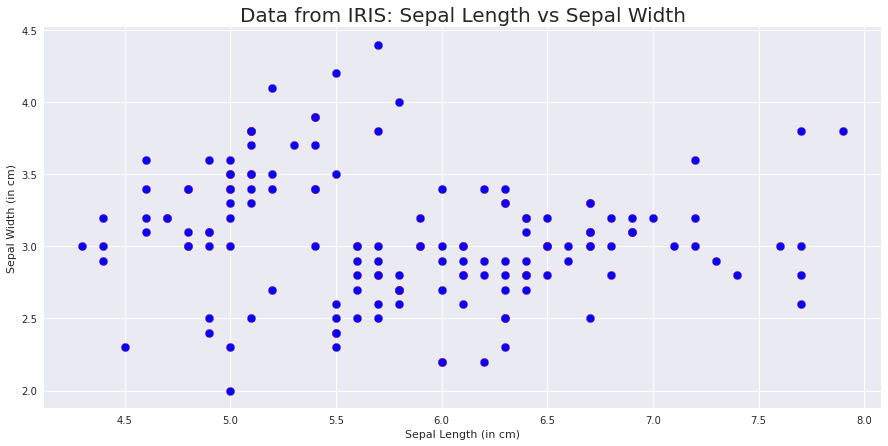

In [46]:
#Plotting the points again
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(x=clustering_data_GMM['sepal length (cm)'],y=clustering_data_GMM['sepal width (cm)'], s=70, color='blue', edgecolor='#f73434', linewidth=0.3)
ax.set_ylabel('Sepal Width (in cm)')
ax.set_xlabel('Sepal Length (in cm)')
plt.title('Data from IRIS: Sepal Length vs Sepal Width', fontsize = 20)
plt.show()

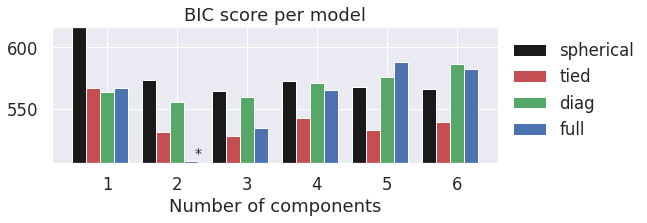

In [47]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a mixture of gaussians with EM
        gmm_aicbic = GaussianMixture(n_components=n_components, covariance_type=cv_type)
        gmm_aicbic.fit(clustering_data_GMM.iloc[:,[0,1]])
        bic.append(gmm_aicbic.bic(clustering_data_GMM.iloc[:,[0,1]]))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm_aicbic

bic = np.array(bic)
color_iter = itertools.cycle(['k', 'r', 'g', 'b', 'c', 'm', 'y'])
clf = best_gmm
bars = []

# Plot the BIC scores
spl = pl.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(pl.bar(xpos, bic[i * len(n_components_range):
                                 (i + 1) * len(n_components_range)],
                       width=.2, color=color))
pl.xticks(n_components_range)
pl.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
pl.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
pl.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types,loc='upper left', bbox_to_anchor=(1, 0.5, 0.5, 0.5))

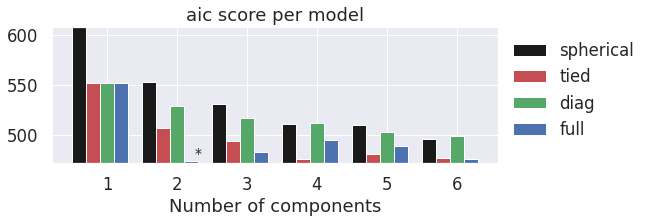

In [48]:
lowest_aic = np.infty
aic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a mixture of gaussians with EM
        gmm_aic = GaussianMixture(n_components=n_components, covariance_type=cv_type)
        gmm_aic.fit(clustering_data_GMM.iloc[:,[0,1]])
        aic.append(gmm_aic.aic(clustering_data_GMM.iloc[:,[0,1]]))
        if aic[-1] < lowest_aic:
            lowest_aic = aic[-1]
            best_gmmaic = gmm_aic

aic = np.array(aic)
color_iter = itertools.cycle(['k', 'r', 'g', 'b', 'c', 'm', 'y'])
clf_aic = best_gmmaic
bars = []

# Plot the BIC scores
splaic = pl.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(pl.bar(xpos, aic[i * len(n_components_range):
                                 (i + 1) * len(n_components_range)],
                       width=.2, color=color))
pl.xticks(n_components_range)
pl.ylim([aic.min() * 1.01 - .01 * aic.max(), aic.max()])
pl.title('aic score per model')
xpos = np.mod(aic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(aic.argmin() / len(n_components_range))
pl.text(xpos, aic.min() * 0.97 + .03 * aic.max(), '*', fontsize=14)
splaic.set_xlabel('Number of components')
splaic.legend([b[0] for b in bars], cv_types,loc='upper left', bbox_to_anchor=(1, 0.5, 0.5, 0.5))

In [49]:
gmm = GaussianMixture(n_components = 3)
gmm.fit(clustering_data_GMM)

GaussianMixture(n_components=3)

In [50]:
# Assign a label to each sample
clustering_prediction_GMM = clustering_data_GMM.copy()
clustering_prediction_GMM['target_prediction'] = gmm.predict(clustering_data_GMM)
clustering_prediction_GMM

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_prediction
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [51]:
GMM_clustered = clustering_prediction_GMM.copy()

GMM_frames = [df['species'], GMM_clustered['target_prediction']]
GMM_result = pd.concat(GMM_frames, axis = 1)
print(GMM_result.shape)
GMM_result.sample(10)

(150, 2)


,species,target_prediction
113,virginica,2
68,versicolor,2
91,versicolor,0
11,setosa,1
120,virginica,2
9,setosa,1
115,virginica,2
35,setosa,1
116,virginica,2
29,setosa,1


In [52]:
for category_no in range(3):

    #group by species and count the size of target_prediction by the category no
    GMM_clusters = pd.DataFrame(GMM_result[GMM_result['target_prediction'] == category_no].groupby('species').size())
    GMM_clusters.columns=['Size']
    #print(clusters)
    
    new_index = GMM_clusters.index[GMM_clusters['Size'] == GMM_clusters['Size'].max()].tolist()
    #print(new_index)
    new_index[0]

    rowIndex = GMM_result.index[GMM_result['target_prediction'] == category_no]
    GMM_result.loc[rowIndex, 'TransLabel'] = new_index[0]
    
    print(category_no, new_index[0])

0 versicolor
1 setosa
2 virginica


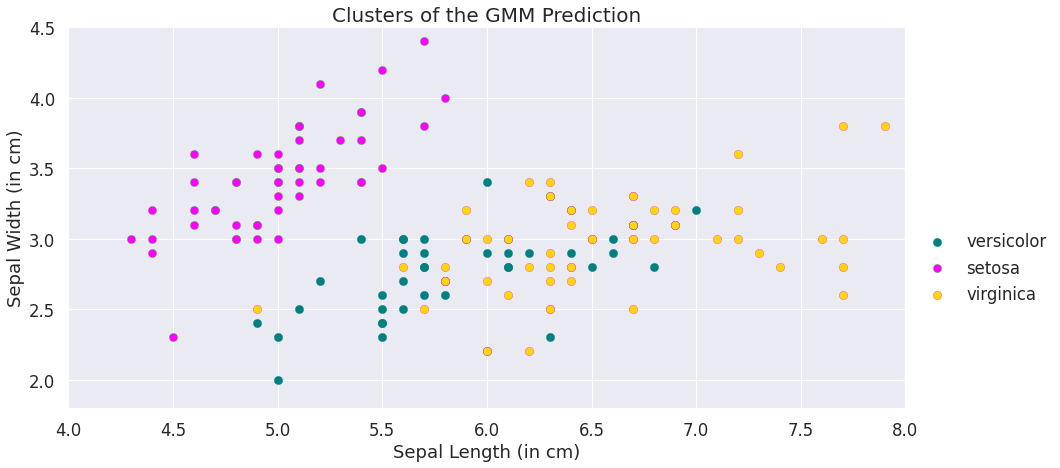

In [53]:
fig, ax = plt.subplots(figsize=(15,7)) 
plt.scatter(x=clustering_prediction_GMM[clustering_prediction_GMM['target_prediction'] == 0]['sepal length (cm)'],
            y=clustering_prediction_GMM[clustering_prediction_GMM['target_prediction'] == 0]['sepal width (cm)'],
            s=70,edgecolor='teal', linewidth=0.3, c='teal', label='versicolor')


plt.scatter(x=clustering_prediction_GMM[clustering_prediction_GMM['target_prediction'] == 1]['sepal length (cm)'],
            y=clustering_prediction_GMM[clustering_prediction_GMM['target_prediction'] == 1]['sepal width (cm)'],
            s=70,edgecolor='lime', linewidth=0.3, c='magenta', label='setosa')


plt.scatter(x=clustering_prediction_GMM[clustering_prediction_GMM['target_prediction'] == 2]['sepal length (cm)'],
            y=clustering_prediction_GMM[clustering_prediction_GMM['target_prediction'] == 2]['sepal width (cm)'],
            s=70,edgecolor='magenta', linewidth=0.3, c='gold', label='virginica')

plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))
plt.xlim(4,8)
plt.ylim(1.8,4.5)
ax.set_ylabel('Sepal Width (in cm)')
ax.set_xlabel('Sepal Length (in cm)')
plt.title('Clusters of the GMM Prediction', fontsize = 20)
plt.show()

In [54]:
#print(GMM_result)
print("Performance for GMM\n")

#calculate the number of correct species identified
correct_species = (df['species'] == GMM_result['TransLabel']).sum()
#over the total no of data
accuracy_score = correct_species/df.shape[0]
print('Accuracy score: ', accuracy_score)

#calculate the Silhouette Score
silhouette_score_gmm = silhouette_score(clustering_data_GMM, GMM_result['TransLabel'],metric='sqeuclidean')
print('Silhouette Score: ', silhouette_score_gmm)

#calculate Homogeneity Score
print('Homogeneity Score: ', homogeneity_score(df['species'], GMM_result['TransLabel']))

#calculate Completeness Score
print('Completeness Score: ', completeness_score(df['species'], GMM_result['TransLabel']))

#V Measure Score
print('V Measure Score: ', v_measure_score(df['species'], GMM_result['TransLabel']))

#Adjusted Random Score
print('Adjusted Random Score: ', adjusted_rand_score(df['species'], GMM_result['TransLabel']))

#Adjusted Mutual Info Score
print('Adjusted Mutual Info Score: ', adjusted_mutual_info_score(df['species'], GMM_result['TransLabel']))

#print(km.labels_)
#print(clustering_prediction_GMM['target_prediction'].values)

#Davies Bouldin Score
print('Davies Bouldin Score: ', davies_bouldin_score(clustering_data_GMM, clustering_prediction_GMM['target_prediction'].values))

#Calinsku Harabasz Score
print('Calinsku Harabasz Score: ', calinski_harabasz_score(clustering_data_GMM, clustering_prediction_GMM['target_prediction'].values))


Performance for GMM

Accuracy score:  0.9666666666666667
Silhouette Score:  0.6503211087534225
Homogeneity Score:  0.8983263672602775
Completeness Score:  0.9010648908640206
V Measure Score:  0.8996935451597475
Adjusted Random Score:  0.9038742317748124
Adjusted Mutual Info Score:  0.89843610336763
Davies Bouldin Score:  0.7483456326731005
Calinsku Harabasz Score:  481.78070899745234


# Difference between K-Means and GMM

In [55]:
# Try GMMs using different types of covariances in 2d: petal length vs petal width
estimators = dict((cov_type, GaussianMixture(n_components=3,
                   covariance_type=cov_type, max_iter=20, random_state=0))
                  for cov_type in ['spherical', 'diag', 'tied', 'full'])
for (name,estimator) in estimators.items():
    estimator.fit(iris.data[:,0:2]) ## fits a mixture model using EM

In [56]:
from matplotlib.patches import Ellipse
def plot_cov_ellipse(cov, pos, col='b', nstd=2, ax=None, **kwargs):
    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]
    if ax is None:
        ax = plt.gca()
    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
    # Width and height are "full" widths, not radius
    width, height = 2 * nstd * np.sqrt(vals)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, color=col, alpha=0.2,**kwargs)
    ax.add_artist(ellip)
    return ellip

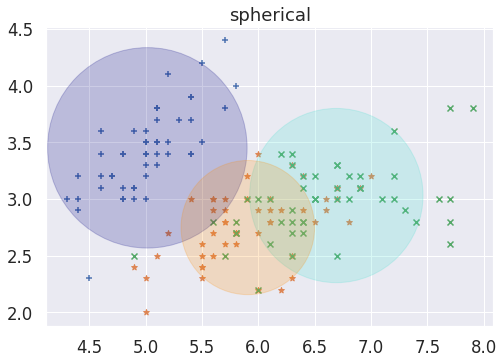

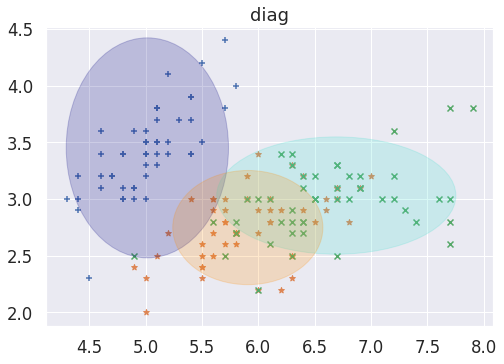

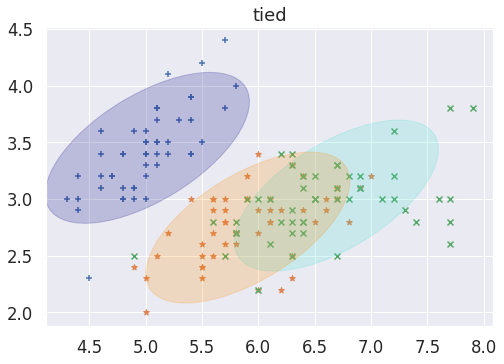

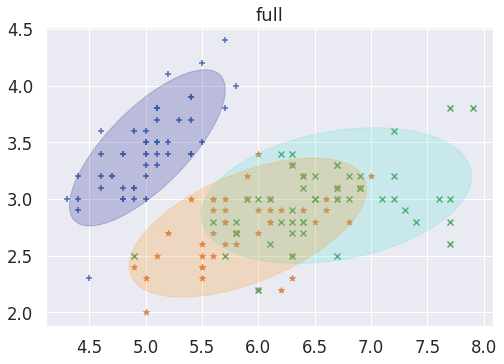

In [57]:
colors = ['navy', 'turquoise', 'darkorange']
markers = ['+','*','x']
for (name,gmm) in estimators.items():
    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:, 0], data[:, 1], marker=markers[n])
        if gmm.covariance_type == 'full':
            cov = gmm.covariances_[n]
        elif gmm.covariance_type == 'tied':
            cov = gmm.covariances_
        elif gmm.covariance_type == 'diag':
            cov = np.diag(gmm.covariances_[n])
        elif gmm.covariance_type == 'spherical':
            cov = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        #print(cov)
        pos = estimator.means_[n]
        #print(pos)
        plot_cov_ellipse(cov,pos,col=color)
    plt.title(name)
    plt.show()